# This is a Classification notebook

### Importing the required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import os 
import graphviz
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

### Loding the classification data

In [2]:
df_creditcard= pd.read_csv("Credit_card_application.csv")
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2
1,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1


### Reading Data from credit_record csv file.

In [3]:
df_cardrecord= pd.read_csv("credit_record.csv")
df_cardrecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


### Reading Data from credit_record csv file.

In [4]:
#Checking the shape of the data
df_creditcard.shape

(438557, 18)

### Checking info of creditcard dataframe

In [5]:
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          422958 non-null  object 
 2   FLAG_OWN_CAR         416886 non-null  object 
 3   FLAG_OWN_REALTY      416818 non-null  object 
 4   CNT_CHILDREN         416976 non-null  float64
 5   AMT_INCOME_TOTAL     417203 non-null  float64
 6   NAME_INCOME_TYPE     416524 non-null  object 
 7   NAME_EDUCATION_TYPE  415537 non-null  object 
 8   NAME_FAMILY_STATUS   416543 non-null  object 
 9   NAME_HOUSING_TYPE    415359 non-null  object 
 10  DAYS_BIRTH           416558 non-null  float64
 11  DAYS_EMPLOYED        416921 non-null  float64
 12  FLAG_MOBIL           416527 non-null  float64
 13  FLAG_WORK_PHONE      417023 non-null  float64
 14  FLAG_PHONE           417737 non-null  float64
 15  FLAG_EMAIL       

### Checking shape of creditcard dataframe

In [6]:
df_cardrecord.shape

(1048575, 3)

### Checking info of cardrecord dataframe

In [7]:
df_cardrecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
#Checking columns creditcard
df_creditcard.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

## Cleaning the dataset and imputing the values after checking the visualization on different charts

In [9]:
#Checking columns cardrecord
df_cardrecord.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [10]:
#Checking null values in df_creditcard
df_creditcard.isna().sum()

ID                          0
CODE_GENDER             15599
FLAG_OWN_CAR            21671
FLAG_OWN_REALTY         21739
CNT_CHILDREN            21581
AMT_INCOME_TOTAL        21354
NAME_INCOME_TYPE        22033
NAME_EDUCATION_TYPE     23020
NAME_FAMILY_STATUS      22014
NAME_HOUSING_TYPE       23198
DAYS_BIRTH              21999
DAYS_EMPLOYED           21636
FLAG_MOBIL              22030
FLAG_WORK_PHONE         21534
FLAG_PHONE              20820
FLAG_EMAIL              20654
OCCUPATION_TYPE        134725
CNT_FAM_MEMBERS             0
dtype: int64

### Checking null values

In [11]:
df_cardrecord.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

## We see that nearly 5-10% data is missing in df_creditcard dataframe. We will be analysing each column in df_creditcard and substituting with appropriate values df_creditcard['CODE_GENDER']

In [12]:
print(df_creditcard['CODE_GENDER'].value_counts())
print("\nNumber of null values are",df_creditcard['CODE_GENDER'].isna().sum())
# substituting nulls with maximum value that is F
df_creditcard['CODE_GENDER'].replace(to_replace=np.NaN,value='F',inplace=True)

F    284011
M    138947
Name: CODE_GENDER, dtype: int64

Number of null values are 15599


### df_creditcard['CODE_GENDER'] decription

In [13]:
#df_creditcard['CODE_GENDER'] decription
df_creditcard['CODE_GENDER'].describe()

count     438557
unique         2
top            F
freq      299610
Name: CODE_GENDER, dtype: object

### Graph of Percentage of Applications based on Gender

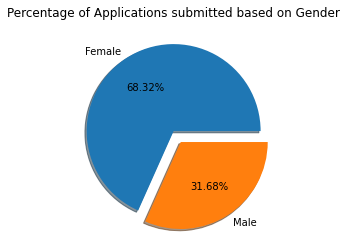

In [14]:
explode =[0.0, 0.15]
plt.pie(df_creditcard['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on Gender')
plt.show()

In [15]:
df_creditcard['CODE_GENDER'].isna().sum()

0

### Mapping Female to 1 and male to 0

In [16]:
#Mapping Female to 1 and male to 0
df_creditcard['CODE_GENDER'] = df_creditcard['CODE_GENDER'].map({'F':1, 'M':0}).astype(object)

In [17]:
df_creditcard['CODE_GENDER'].value_counts()

1    299610
0    138947
Name: CODE_GENDER, dtype: int64

### Counting values in FLAG_OWN_CAR column and checking for nulls

In [18]:
# FLAG_OWN_CAR column
print(df_creditcard['FLAG_OWN_CAR'].value_counts())
print("\nNumber of null values are",df_creditcard['FLAG_OWN_CAR'].isna().sum())

N    261672
Y    155214
Name: FLAG_OWN_CAR, dtype: int64

Number of null values are 21671


### substituting nulls with maximum value that is N

In [19]:
# substituting nulls with maximum value that is N
df_creditcard['FLAG_OWN_CAR'].replace(to_replace=np.NaN,value='N',inplace=True)

### Graph of Percentage of Applications based on owning a car

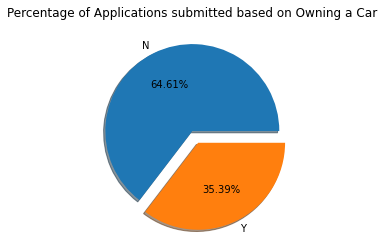

In [20]:
#Visulaization of FLAG_OWN_CAR column
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_OWN_CAR'].value_counts(), labels=['N', 'Y'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on Owning a Car')
plt.show()

In [21]:
df_creditcard['FLAG_OWN_CAR'].value_counts()

N    283343
Y    155214
Name: FLAG_OWN_CAR, dtype: int64

In [22]:
df_creditcard['FLAG_OWN_CAR'] = df_creditcard['FLAG_OWN_CAR'].map({'N':1, 'Y':0}).astype(int)

In [23]:
df_creditcard['FLAG_OWN_CAR'].value_counts()

1    283343
0    155214
Name: FLAG_OWN_CAR, dtype: int64

### Now Based on owing a reality

In [24]:
# Now Based on owing reality
print(df_creditcard['FLAG_OWN_REALTY'].value_counts())
print("\nNumber of null values are",df_creditcard['FLAG_OWN_REALTY'].isna().sum())

Y    289612
N    127206
Name: FLAG_OWN_REALTY, dtype: int64

Number of null values are 21739


In [25]:
df_creditcard['FLAG_OWN_REALTY'].value_counts()

Y    289612
N    127206
Name: FLAG_OWN_REALTY, dtype: int64

### Graph of Percentage of Applications based on real estate

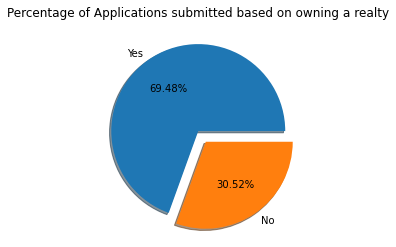

In [26]:
# Visulization based on owning a realty
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_OWN_REALTY'].value_counts(), labels=['Yes', 'No'],explode=explode,shadow= 0.2, autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on owning a realty')
plt.show()

In [27]:
df_creditcard['FLAG_OWN_REALTY'].replace(to_replace=np.NaN,value='Y',inplace=True)

In [28]:
df_creditcard['FLAG_OWN_REALTY'] = df_creditcard['FLAG_OWN_REALTY'].map({'Y':1, 'N':0}).astype(object)

In [29]:
df_creditcard['FLAG_OWN_REALTY'].value_counts()

1    311351
0    127206
Name: FLAG_OWN_REALTY, dtype: int64

In [30]:
df_creditcard['FLAG_OWN_REALTY'].isna().sum()

0

In [31]:
df_creditcard['FLAG_OWN_REALTY'].value_counts()

1    311351
0    127206
Name: FLAG_OWN_REALTY, dtype: int64

### Counting children - CNT_CHILDREN column

In [32]:
#Counting children - CNT_CHILDREN
df_creditcard['CNT_CHILDREN'].value_counts()

0.0     289135
1.0      84224
2.0      37881
3.0       5117
4.0        463
5.0        133
7.0          9
9.0          5
12.0         4
6.0          4
19.0         1
Name: CNT_CHILDREN, dtype: int64

In [33]:
#This ordinal data, but no changes are been made because children can be any whole number in real-time
#Checking for null value
df_creditcard['CNT_CHILDREN'].isna().sum()

21581

In [34]:
#Mapping missing values to 0 children
df_creditcard['CNT_CHILDREN'].replace(to_replace=np.NaN,value=0,inplace=True)

### AMT_INCOME_TOTAL column

In [35]:
#AMT_INCOME_TOTAL is a continuous value
df_creditcard['AMT_INCOME_TOTAL'].value_counts()

135000.00    44739
157500.00    37730
180000.00    35950
112500.00    35203
225000.00    32648
             ...  
109603.35        1
123916.50        1
32139.00         1
362911.50        1
125730.00        1
Name: AMT_INCOME_TOTAL, Length: 841, dtype: int64

In [36]:
df_creditcard['AMT_INCOME_TOTAL'].isna().sum()

21354

### Plot visulaization of AMT_INCOME_TOTAL column

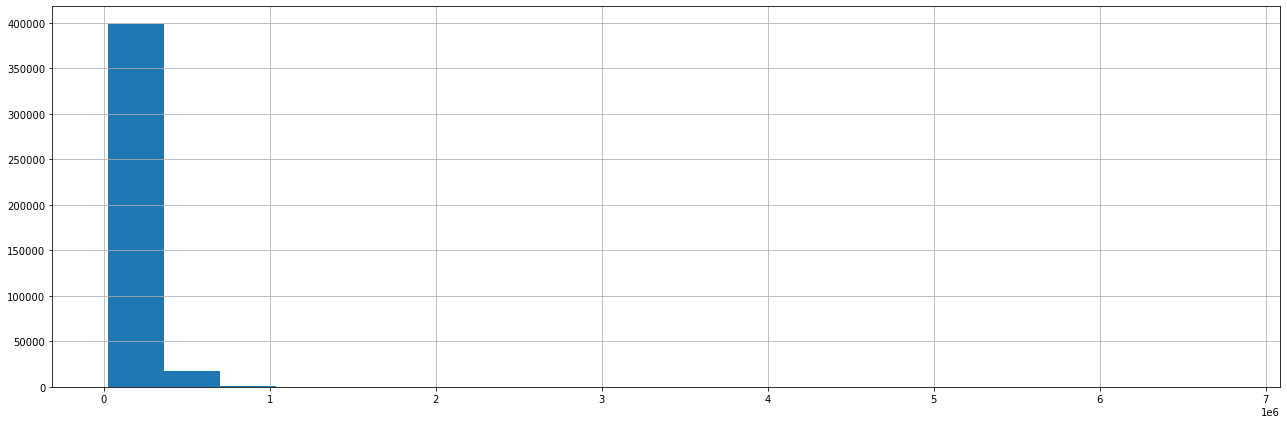

In [37]:
#plot visulaization of AMT_INCOME_TOTAL column
plt.figure(figsize=(22,7))
plt.hist(df_creditcard['AMT_INCOME_TOTAL'],bins=20)
plt.grid()
plt.show()

### The visualization is slightly right skewed, so we are replcing null values with median of the AMT_INCOME_TOTAL column

In [38]:
# The visualization is slightly right skewed, so we are replcing null values with median of the AMT_INCOME_TOTAL column
df_creditcard['AMT_INCOME_TOTAL'].replace(to_replace=np.NaN,value=df_creditcard['AMT_INCOME_TOTAL'].median(),inplace=True)

In [39]:
#After replacing with median values
df_creditcard['AMT_INCOME_TOTAL'].value_counts()

135000.00    44739
157500.00    37730
180000.00    35950
112500.00    35203
225000.00    32648
             ...  
109603.35        1
123916.50        1
32139.00         1
362911.50        1
125730.00        1
Name: AMT_INCOME_TOTAL, Length: 841, dtype: int64

In [40]:
#Validating NAME_INCOME_TYPE column
df_creditcard['NAME_INCOME_TYPE'].value_counts()

Working                 214760
Commercial associate     95771
Pensioner                71770
State servant            34214
Student                      9
Name: NAME_INCOME_TYPE, dtype: int64

### Visulization of NAME_INCOME_TYPE column

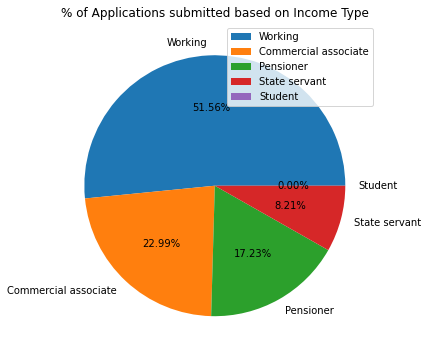

In [41]:
#Visulization of NAME_INCOME_TYPE column
plt.figure(figsize = (6,6))
plt.pie(df_creditcard['NAME_INCOME_TYPE'].value_counts(), 
        labels=df_creditcard['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

In [42]:
#Checking for null values
df_creditcard['NAME_INCOME_TYPE'].isna().sum()

22033

#### Here 22033 have null values, so we are putting them in 'Working category' rather than putting in No working as this would cause an impact in another way

In [43]:
# Here 22033 have null values, so we are putting them in 'Working category' rather than putting in No working as this would cause an impact in another way
df_creditcard['NAME_INCOME_TYPE'].replace(to_replace=np.NaN,value='Working',inplace=True)

### We use one-hot encoding on NAME_INCOME_TYPE

In [44]:
#we use one-hot encoding on NAME_INCOME_TYPE
cols = pd.get_dummies(df_creditcard['NAME_INCOME_TYPE'], prefix= 'NAME_INCOME_TYPE')
df_creditcard[cols.columns] = cols
df_creditcard.drop('NAME_INCOME_TYPE', axis = 1, inplace = True)
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working
0,5008804,0,0,1,0.0,427500.0,Higher education,Civil marriage,Rented apartment,-12005.0,...,1.0,0.0,0.0,NaN,2,0,0,0,0,1
1,5008805,0,0,1,0.0,427500.0,Higher education,Civil marriage,Rented apartment,-12005.0,...,1.0,0.0,0.0,NaN,2,0,0,0,0,1
2,5008806,0,0,1,0.0,112500.0,Secondary / secondary special,Married,House / apartment,-21474.0,...,0.0,0.0,0.0,Security staff,2,0,0,0,0,1
3,5008808,1,1,1,0.0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110.0,...,0.0,1.0,1.0,Sales staff,1,1,0,0,0,0
4,5008809,1,1,1,0.0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110.0,...,0.0,1.0,1.0,Sales staff,1,1,0,0,0,0


In [45]:
#Checking for data in NAME_EDUCATION_TYPE column
df_creditcard['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    286031
Higher education                 111433
Incomplete higher                 13921
Lower secondary                    3886
Academic degree                     266
Name: NAME_EDUCATION_TYPE, dtype: int64

### Visualization on the basis of Education Type

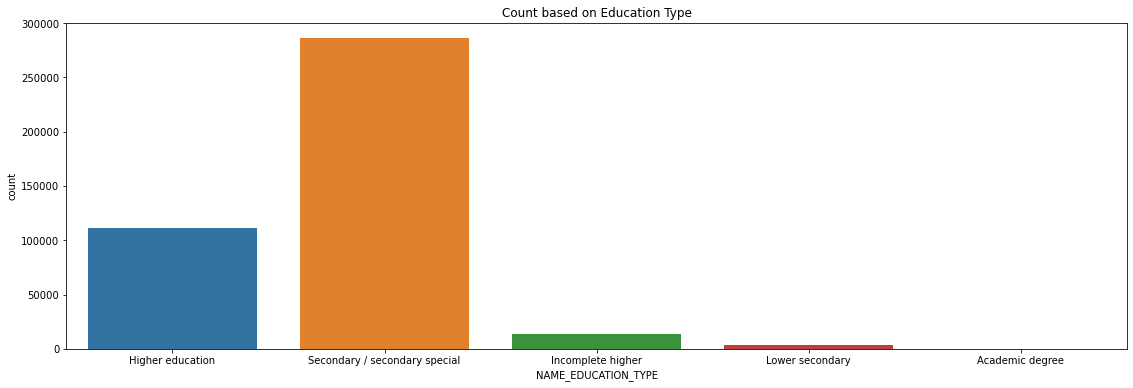

In [46]:
#PLotting visulaization
plt.figure(figsize=(19,6))
sns.countplot(x='NAME_EDUCATION_TYPE',data=df_creditcard)
plt.title('Count based on Education Type')
plt.show()

In [47]:
#checking for null values
df_creditcard['NAME_EDUCATION_TYPE'].isna().sum()

23020

In [48]:
#Replcing null value with highest Education Type
df_creditcard['NAME_EDUCATION_TYPE'].replace(to_replace=np.NaN,value='Secondary / secondary special',inplace=True)

### we use one-hot encoding on NAME_EDUCATION_TYPE

In [49]:
#we use one-hot encoding on NAME_EDUCATION_TYPE
cols = pd.get_dummies(df_creditcard['NAME_EDUCATION_TYPE'], prefix= 'NAME_EDUCATION_TYPE')
df_creditcard[cols.columns] = cols
df_creditcard.drop('NAME_EDUCATION_TYPE', axis = 1, inplace = True)
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,5008804,0,0,1,0.0,427500.0,Civil marriage,Rented apartment,-12005.0,-4542.0,...,0,0,0,0,1,0,1,0,0,0
1,5008805,0,0,1,0.0,427500.0,Civil marriage,Rented apartment,-12005.0,-4542.0,...,0,0,0,0,1,0,1,0,0,0
2,5008806,0,0,1,0.0,112500.0,Married,House / apartment,-21474.0,-1134.0,...,0,0,0,0,1,0,0,0,0,1
3,5008808,1,1,1,0.0,270000.0,Single / not married,House / apartment,-19110.0,-3051.0,...,1,0,0,0,0,0,0,0,0,1
4,5008809,1,1,1,0.0,270000.0,Single / not married,House / apartment,-19110.0,-3051.0,...,1,0,0,0,0,0,0,0,0,1


In [50]:
#Checking for NAME_FAMILY_STATUS columns
df_creditcard['NAME_FAMILY_STATUS'].value_counts()

Married                 284648
Single / not married     52723
Civil marriage           34583
Separated                25811
Widow                    18778
Name: NAME_FAMILY_STATUS, dtype: int64

### Visualization on the basis of Family Status

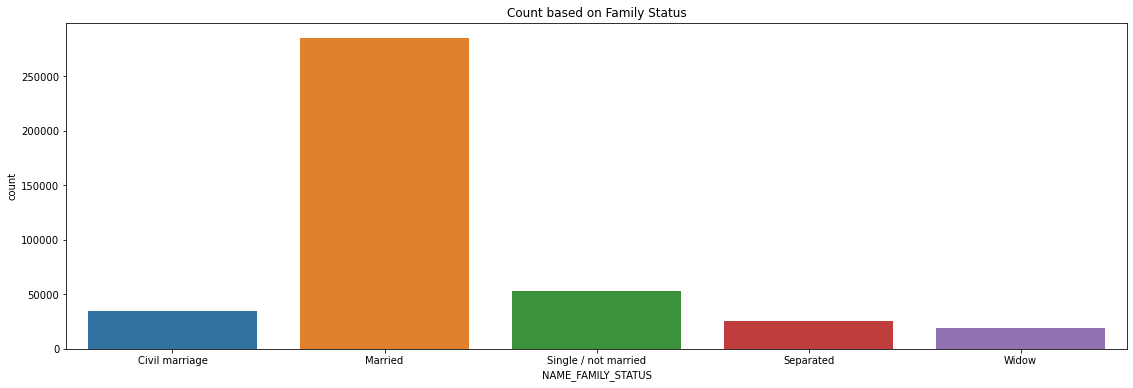

In [51]:
#Visulization
plt.figure(figsize=(19,6))
sns.countplot(x='NAME_FAMILY_STATUS',data=df_creditcard)
plt.title('Count based on Family Status')
plt.show()

In [52]:
#Checking for null values
df_creditcard['NAME_FAMILY_STATUS'].isna().sum()

22014

In [53]:
#Replcing Null values with highest value- married
df_creditcard['NAME_FAMILY_STATUS'].replace(to_replace=np.NaN,value='Married',inplace=True)

In [54]:
#Nulls after substituting
df_creditcard['NAME_FAMILY_STATUS'].isna().sum()

0

In [55]:
#we use one-hot encoding on NAME_FAMILY_STATUS
cols = pd.get_dummies(df_creditcard['NAME_FAMILY_STATUS'], prefix= 'NAME_FAMILY_STATUS')
df_creditcard[cols.columns] = cols
df_creditcard.drop('NAME_FAMILY_STATUS', axis = 1, inplace = True)
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,5008804,0,0,1,0.0,427500.0,Rented apartment,-12005.0,-4542.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,5008805,0,0,1,0.0,427500.0,Rented apartment,-12005.0,-4542.0,1.0,...,0,1,0,0,0,1,0,0,0,0
2,5008806,0,0,1,0.0,112500.0,House / apartment,-21474.0,-1134.0,1.0,...,0,0,0,0,1,0,1,0,0,0
3,5008808,1,1,1,0.0,270000.0,House / apartment,-19110.0,-3051.0,1.0,...,0,0,0,0,1,0,0,0,1,0
4,5008809,1,1,1,0.0,270000.0,House / apartment,-19110.0,-3051.0,1.0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
#NAME_HOUSING_TYPE column
df_creditcard['NAME_HOUSING_TYPE'].value_counts()

House / apartment      372961
With parents            18078
Municipal apartment     13549
Rented apartment         5573
Office apartment         3719
Co-op apartment          1479
Name: NAME_HOUSING_TYPE, dtype: int64

### Visualization on the basis of house type

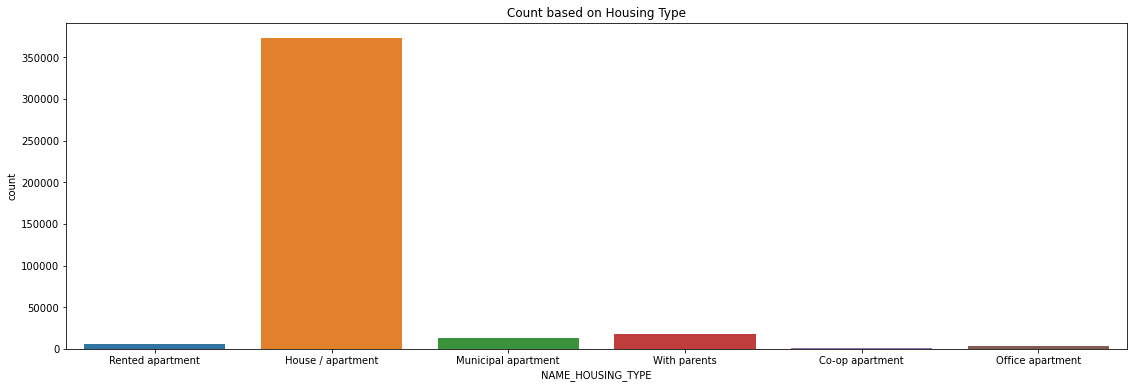

In [57]:
#Visulization
plt.figure(figsize=(19,6))
sns.countplot(x='NAME_HOUSING_TYPE',data=df_creditcard)
plt.title('Count based on Housing Type')
plt.show()

In [58]:
# Checking for null values
df_creditcard['NAME_HOUSING_TYPE'].isna().sum()

23198

In [59]:
#Replcing null values with maximum modal value 
df_creditcard['NAME_HOUSING_TYPE'].replace(to_replace=np.NaN,value='House / apartment',inplace=True)

In [60]:
# Checking for null values after substituting
df_creditcard['NAME_HOUSING_TYPE'].isna().sum()

0

In [61]:
#Applying one-hot vector
cols = pd.get_dummies(df_creditcard['NAME_HOUSING_TYPE'], prefix= 'NAME_HOUSING_TYPE')
df_creditcard[cols.columns] = cols
df_creditcard.drop('NAME_HOUSING_TYPE', axis = 1, inplace = True)
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,0,0,1,0.0,427500.0,-12005.0,-4542.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,5008805,0,0,1,0.0,427500.0,-12005.0,-4542.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,5008806,0,0,1,0.0,112500.0,-21474.0,-1134.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
3,5008808,1,1,1,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,0
4,5008809,1,1,1,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,0


In [62]:
#Checking for Days_Birth 
df_creditcard['DAYS_BIRTH'].value_counts()

-11707.0    150
-14400.0    116
-14178.0    116
-14055.0    111
-20107.0    106
           ... 
-9304.0       1
-18399.0      1
-8098.0       1
-9399.0       1
-24802.0      1
Name: DAYS_BIRTH, Length: 16331, dtype: int64

In [63]:
df_creditcard['DAYS_BIRTH'].isna().sum()

21999

### Count based on Days of Birth

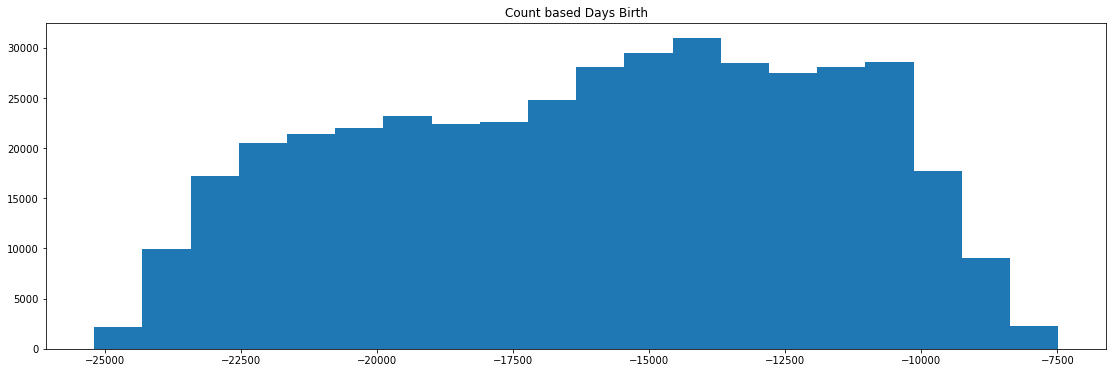

In [64]:
#Visalization of DAYS_BIRTH column
plt.figure(figsize=(19,6))
plt.hist(df_creditcard['DAYS_BIRTH'],bins='sturges')
plt.title('Count based Days Birth')
plt.show()

### Replacing null values with median as data is slightly skewed

In [65]:
#Replacing null values with median as data is slightly skewed
df_creditcard['DAYS_BIRTH'].replace(to_replace=np.NaN,value=df_creditcard['DAYS_BIRTH'].median(),inplace=True)

In [66]:
#Converting DAYS_BIRTH into YEARS
df_creditcard['DAYS_BIRTH'] = round(df_creditcard['DAYS_BIRTH']/-365,0)
df_creditcard.rename(columns={'DAYS_BIRTH':'YEARS'}, inplace=True)
df_creditcard['YEARS'].value_counts()

43.0    33951
39.0    13347
40.0    12559
42.0    12286
32.0    12125
38.0    12070
28.0    12060
41.0    11957
37.0    11863
36.0    11764
30.0    11704
35.0    11617
44.0    11541
29.0    11501
33.0    11454
34.0    11285
31.0    10787
46.0    10271
45.0    10169
54.0     9985
47.0     9712
48.0     9510
53.0     9372
52.0     9347
49.0     9342
57.0     9280
55.0     9278
60.0     9207
51.0     9193
50.0     9015
58.0     8794
59.0     8737
56.0     8643
27.0     8394
61.0     7949
63.0     7418
62.0     7259
64.0     6444
65.0     5408
26.0     5171
25.0     4373
24.0     3379
23.0     3154
66.0     2361
67.0     1543
22.0      982
68.0      911
69.0       55
21.0       30
Name: YEARS, dtype: int64

In [67]:
df_creditcard['DAYS_EMPLOYED'].value_counts()

 365243.0    71716
-218.0         245
-1678.0        235
-231.0         231
-430.0         230
             ...  
-5793.0          1
-6142.0          1
-6856.0          1
-9466.0          1
-14208.0         1
Name: DAYS_EMPLOYED, Length: 9302, dtype: int64

In [68]:
#We have to remove values which are positive,positive values show that they are unemployed
#Checking for values greater than 0
#Checking unique values greater than 0
df_creditcard[df_creditcard['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()
#replcing with 0
df_creditcard['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [69]:
#Checking for null values
df_creditcard['DAYS_EMPLOYED'].isna().sum()

21636

### Visalization of DAYS_EMPLOYED column

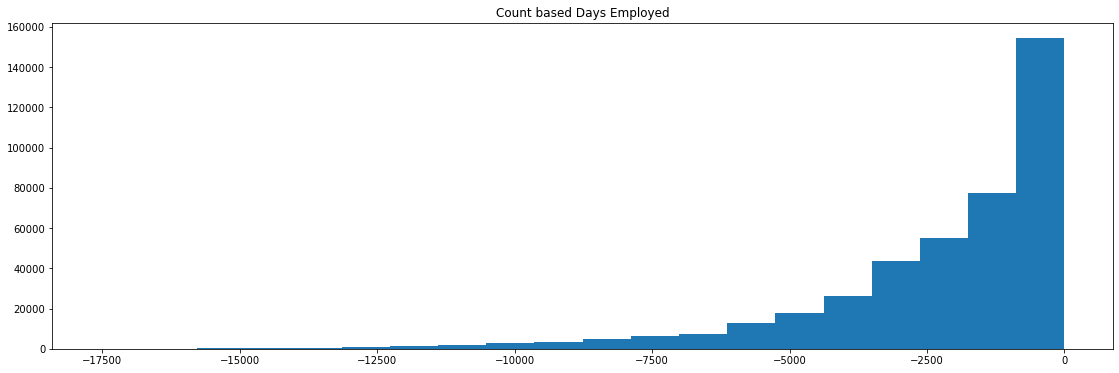

In [70]:
#Visalization of DAYS_EMPLOYED column
plt.figure(figsize=(19,6))
plt.hist(df_creditcard['DAYS_EMPLOYED'],bins='sturges')
plt.title('Count based Days Employed')
plt.show()

### Replacing null values with median as data is slightly skewed

In [71]:
#Replacing null values with median as data is slightly skewed
df_creditcard['DAYS_EMPLOYED'].replace(to_replace=np.NaN,value=df_creditcard['DAYS_EMPLOYED'].median(),inplace=True)

In [72]:
##Converting 'DAYS_EMPLOYED' values from Day to Years
df_creditcard['DAYS_EMPLOYED'] = abs(round(df_creditcard['DAYS_EMPLOYED']/-365,0))
df_creditcard.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True) 

### Count based Years Employed

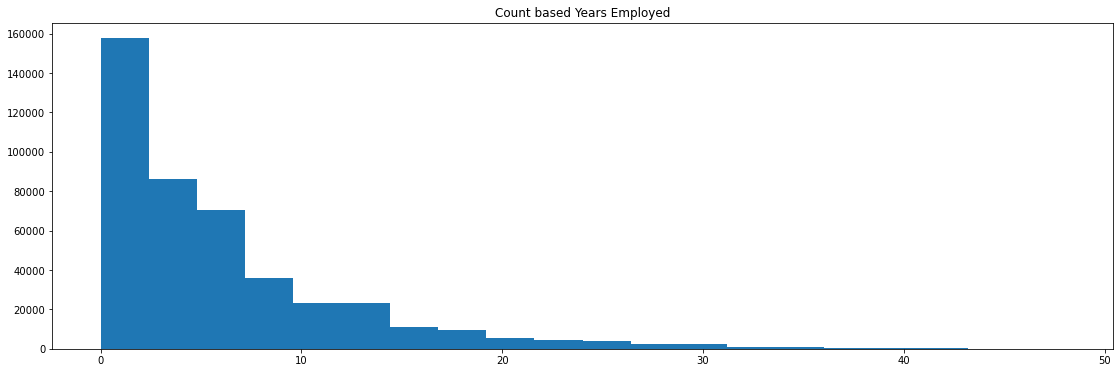

In [73]:
#Visulization after converting to years
plt.figure(figsize=(19,6))
plt.hist(df_creditcard['YEARS_EMPLOYED'],bins='sturges')
plt.title('Count based Years Employed')
plt.show()

In [74]:
#FLAG_MOBIL Column
df_creditcard['FLAG_MOBIL'].value_counts()

1.0    416527
Name: FLAG_MOBIL, dtype: int64

In [75]:
df_creditcard['FLAG_MOBIL'].isna().sum()

22030

### All the values of this column are 1, so dropping the column all together

In [76]:
#All the values of this column are 1, so dropping the column all together
df_creditcard.drop('FLAG_MOBIL', axis=1, inplace=True)

In [77]:
# FLAG_WORK_PHONE Column
df_creditcard['FLAG_WORK_PHONE'].value_counts()

0.0    331298
1.0     85725
Name: FLAG_WORK_PHONE, dtype: int64

### Visulization of FLAG_WORK_PHONE

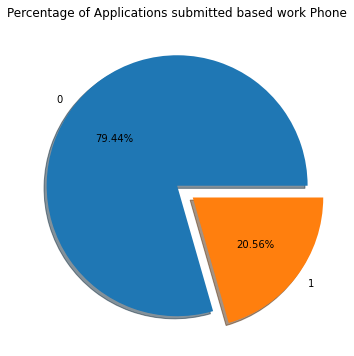

In [78]:
#Visulization of FLAG_WORK_PHONE
plt.figure(figsize=(6,6))
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_WORK_PHONE'].value_counts(), labels=['0', '1'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based work Phone')
plt.show()

In [79]:
df_creditcard['FLAG_WORK_PHONE'].isna().sum()

21534

In [80]:
#Replcing null values with 0
df_creditcard['FLAG_WORK_PHONE'].replace(to_replace=np.NaN,value='0',inplace=True)
#Checking values after replcing
df_creditcard['FLAG_WORK_PHONE'].isna().sum()

0

In [81]:
#FLAG_PHONE
df_creditcard['FLAG_PHONE'].value_counts()

0.0    297661
1.0    120076
Name: FLAG_PHONE, dtype: int64

### Visulization of FLAG_PHONE

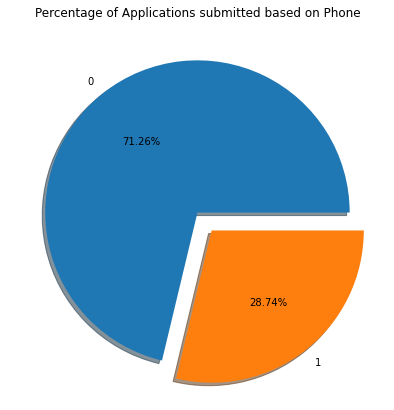

In [82]:
#Visulization of FLAG_PHONE
plt.figure(figsize=(7,7))
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_PHONE'].value_counts(), labels=['0', '1'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on Phone')
plt.show()

In [83]:
df_creditcard['FLAG_PHONE'].isna().sum()

20820

In [84]:
#Replcing null values with 0
df_creditcard['FLAG_PHONE'].replace(to_replace=np.NaN,value='0',inplace=True)
#Checking values after replcing
df_creditcard['FLAG_PHONE'].isna().sum()

0

In [85]:
#Checking for Email
df_creditcard['FLAG_EMAIL'].value_counts()

0.0    372529
1.0     45374
Name: FLAG_EMAIL, dtype: int64

### Visulization of FLAG_EMAIL

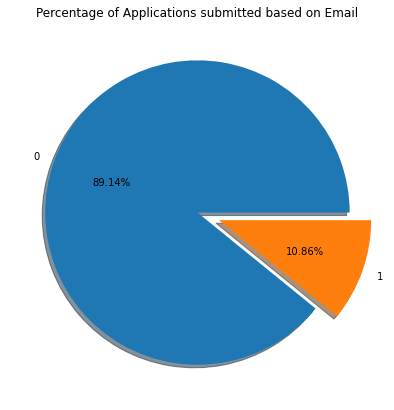

In [86]:
#Visulization of FLAG_EMAIL
plt.figure(figsize=(7,7))
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_EMAIL'].value_counts(), labels=['0', '1'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on Email')
plt.show()

In [87]:
df_creditcard['FLAG_EMAIL'].isna().sum()

20654

In [88]:
#Replcing null values with 0
df_creditcard['FLAG_EMAIL'].replace(to_replace=np.NaN,value='0',inplace=True)
#Checking values after replcing
df_creditcard['FLAG_EMAIL'].isna().sum()

0

In [89]:
#OCCUPATION_TYPE column
df_creditcard['OCCUPATION_TYPE'].value_counts()

Laborers                 78151
Core staff               42934
Sales staff              41000
Managers                 35406
Drivers                  26073
High skill tech staff    17253
Accountants              15939
Medicine staff           13512
Cooking staff             8055
Security staff            7979
Cleaning staff            5839
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2043
Waiters/barmen staff      1654
Realty agents             1041
HR staff                   774
IT staff                   583
Name: OCCUPATION_TYPE, dtype: int64

In [90]:
df_creditcard['OCCUPATION_TYPE'].isna().sum()

134725

In [91]:
#Percentage of missing values in occupation type 
print("Missing %",(df_creditcard['OCCUPATION_TYPE'].isna().sum()/df_creditcard.shape[0]*100))

Missing % 30.72006603474577


### we are dropping the column OCCUPATION_TYPE as the column values are little less significant when comes to determining if a person is defaulter

In [92]:
# we are dropping the column OCCUPATION_TYPE as the column values are little less significant when comes to determining if a person is defaulter.
df_creditcard.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [93]:
#CNT_FAM_MEMBERS column
df_creditcard['CNT_FAM_MEMBERS'].value_counts()

2     233891
1      84492
3      77128
4      37356
5       5081
6        459
7        124
9          9
11         5
14         4
8          4
15         3
20         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [94]:
#Checking for missing values- no missing values
df_creditcard['CNT_FAM_MEMBERS'].isna().sum()

0

In [95]:
df_creditcard.isna().sum()

ID                                                   0
CODE_GENDER                                          0
FLAG_OWN_CAR                                         0
FLAG_OWN_REALTY                                      0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
YEARS                                                0
YEARS_EMPLOYED                                       0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCA

In [96]:
#Now working on df_cardrecord
df_cardrecord.shape

(1048575, 3)

In [97]:
df_cardrecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [98]:
#Checking for nulls
df_cardrecord.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [99]:
#Checking the Status column
df_cardrecord['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [100]:
#Let's Assume that 0: Good Client and 1: Bad client
df_cardrecord['STATUS'].replace(['C', 'X'],0, inplace=True)
df_cardrecord['STATUS'].replace(['2','3','4','5'],1, inplace=True)
df_cardrecord['STATUS'] = df_cardrecord['STATUS'].astype('int')
df_cardrecord['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [101]:
#Grouping by column and storing in another dataframe
df_cardrecord_trans = df_cardrecord.groupby('ID').agg(max).reset_index()

In [102]:
#we are dropping the month balance
df_cardrecord_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
df_cardrecord_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [103]:
#Normalizing Status column
df_cardrecord_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

In [104]:
#Now merging both the dataframes on ID using Inner Join
df_classification = pd.merge(df_creditcard, df_cardrecord_trans, on='ID', how='inner')
df_classification.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,STATUS
0,5008804,0,0,1,0.0,427500.0,33.0,12.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
1,5008805,0,0,1,0.0,427500.0,33.0,12.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,5008806,0,0,1,0.0,112500.0,59.0,3.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,5008808,1,1,1,0.0,270000.0,52.0,8.0,0.0,1.0,...,0,1,0,0,1,0,0,0,0,0
4,5008809,1,1,1,0.0,270000.0,52.0,8.0,0.0,1.0,...,0,1,0,0,1,0,0,0,0,0


In [105]:
#Checking the number of rows and columns after merging
print("Number of rows after merging",df_classification.shape[0])
print("Number of Columns after merging",df_classification.shape[1])

Number of rows after merging 36457
Number of Columns after merging 34


In [106]:
#We are dropping ID as they are unique values 
df_classification.drop('ID',axis=1, inplace=True)

In [107]:
#Checking if there are any duplicates
len(df_classification) - len(df_classification.drop_duplicates())

26109

In [108]:
#Dropping duplicate records and checking shape
df_classification = df_classification.drop_duplicates()
df_classification.reset_index(drop=True ,inplace=True)
df_classification.shape

(10348, 33)

In [109]:
#Checking for nulls
df_classification.isnull().sum()

CODE_GENDER                                          0
FLAG_OWN_CAR                                         0
FLAG_OWN_REALTY                                      0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
YEARS                                                0
YEARS_EMPLOYED                                       0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCA

In [110]:
df_classification['STATUS'].value_counts(normalize=True)*100

0    78.536915
1    21.463085
Name: STATUS, dtype: float64

In [111]:
df_classification =df_classification.sample(n=3000)

In [112]:
df_classification.shape

(3000, 33)

# KNN Classifier

# ``MinMaxScaler``
$$x_{new} = \frac{x - x_{min}}{x_{max}- x_{min}}$$

### First used grid search in order to find out the best parameters and then fit the model using those scores and then print out test and train scores

In [113]:
#We take the 'STATUS' as the target column and est all as the feature columns
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

#We split the training and test data; we take the test data as 20% and the rest 80% as teh training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

#using min max scaler we scale the values and then transform the values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
#Using KNN Classification, we are not applying any parameter , so by default it takes k as 5
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [115]:
#Predicting y using X_test
y_pred=knn.predict(X_test)

In [116]:
#Testing the accuracy score
print('The accuracy for KNN-default is',accuracy_score(y_test, y_pred))

The accuracy for KNN-default is 0.7883333333333333


In [117]:
#We use grid search and best parameters to see the best n value for KNN
param_dist={
    "weights":["uniform"],
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "metric":["minkowski", "manhattan","euclidean","cosine"]
}

In [118]:
grid=GridSearchCV(knn, param_grid=param_dist, cv=5, n_jobs=-1)

In [119]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean',
                                    'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform']})

In [120]:
#Taking the best n_neighbor using grid method
grid.best_estimator_

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [121]:
#Taking the best score using grid method
grid.best_score_

0.7837500000000001

In [122]:
#hyper parameter tunning
grid.best_params_

{'metric': 'cosine', 'n_neighbors': 10, 'weights': 'uniform'}

In [123]:
# now fitting the model with best parameters
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='uniform')
knn.fit(X_train,y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.7858
Test score: 0.8050


### We can also do it using the graph 

In [124]:
#Taking the train and test data set and using min max scalar
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
X_train

array([[1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
#Checking the best n_neighbour value 
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

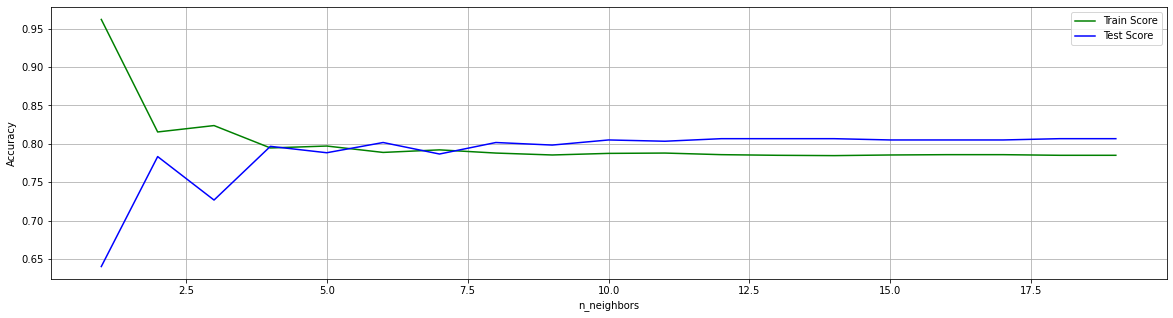

In [127]:
#Plotting the graph and visulaizing the best n_neighbour parameter
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

From the above graph, we can see that the best score is coming at 8 neighbors. Therefore, our best score can't be 16 neighbors as shown earlier by gridsearch

In [128]:
#From the above grph we see that the best value of n_neighbour(k) = 10; substituting k =10 in KNN and va;idating the train and test score 
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.7875
Test score: 0.8050


In [129]:
#Predicting y based on X test data
y_pred_knn =knn.predict(X_test)

In [130]:
#Calculating accuracy score
accuracy_score(y_pred_knn,y_test)

0.805

In [131]:
#Printing Classification re[port]
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       599
           1       0.00      0.00      0.00         1

    accuracy                           0.81       600
   macro avg       0.50      0.40      0.45       600
weighted avg       1.00      0.81      0.89       600



In [132]:
#printing confusion matrix
print(confusion_matrix(y_pred_knn,y_test))

[[483 116]
 [  1   0]]


# Logistic Regression

### 'STATUS' is out target column and rest are feture columns; Splitting data into train and test datasets and applying Min Max Scaler


In [133]:
#'STATUS' is out target column and rest are feture columns; Splitting data into train and test datasets and applying Min Max Scaler

X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

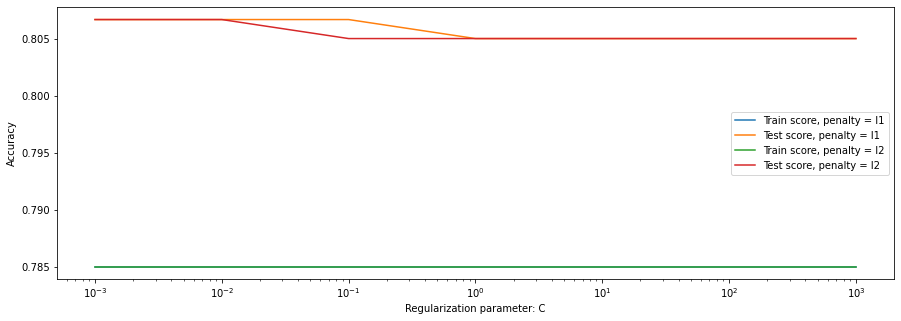

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### The best c parameter as per graph is c=0.01

In [136]:
#Using hypterparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lreg = LogisticRegression(random_state = 0, max_iter = 1000)
grid_lreg = GridSearchCV(lreg, param_grid, cv =5, scoring= 'roc_auc')
grid_lreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [137]:
#Predicting the score
grid_lreg.score(X_test, y_test)

0.519654816186948

In [138]:
from sklearn.metrics import accuracy_score, roc_auc_score

#Predicting y
y_pred = grid_lreg.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print('roc_auc_score: ', roc_auc_score(y_test, grid_lreg.predict_proba(X_test)[:,1]))

accuracy_score:  0.805
roc_auc_score:  0.519654816186948


In [139]:
#Predicting Y
y_pred_lreg =grid_lreg.predict(X_test)

In [142]:
#Printing Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_lreg,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       599
           1       0.00      0.00      0.00         1

    accuracy                           0.81       600
   macro avg       0.50      0.40      0.45       600
weighted avg       1.00      0.81      0.89       600



In [143]:
#Confusion matrix
print(confusion_matrix(y_pred_lreg,y_test))

[[483 116]
 [  1   0]]


## LinearSVC

### Splitting data into train and test and applying min max scalar

In [144]:
#Splitting data into train and test and applying min max scalar
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
#Appying Linear SVC and fitting training data
svc = LinearSVC()
svc.fit(X_train,y_train)

LinearSVC()

In [146]:
#Predicting y using test dataset
y_pred=svc.predict(X_test)

In [147]:
#Predicting accuracy
accuracy_score(y_test, y_pred)

0.8066666666666666

In [148]:
#Predicting the y values
y_pred_svc =svc.predict(X_test)

In [150]:
#Printing Classification report
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       600
           1       0.00      0.00      0.00         0

    accuracy                           0.81       600
   macro avg       0.50      0.40      0.45       600
weighted avg       1.00      0.81      0.89       600



In [152]:
#printing confusion matrix
print(confusion_matrix(y_pred_svc,y_test))

[[484 116]
 [  0   0]]


#### Applying hyper-tuning
#### We are using Grid Search with CV

In [153]:
#Applying hyper-tuning
# We are using Grid Search with CV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)


Best score on validation set: 0.78
Best parameters:  {'C': 0.001, 'gamma': 0.001}


In [154]:
test_score = svm.score(X_test, y_test)
print(test_score)

0.8066666666666666


In [155]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [156]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [157]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [158]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.78


In [159]:
#finding train and test scores for best parameters
svm = SVC(gamma=0.001, C=0.001)
svm.fit(X_train, y_train)

print('Train score: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svm.score(X_test, y_test)))

Train score: 0.7850
Test score: 0.8067


In [160]:
y_pred_sv =svm.predict(X_test)
accuracy_score(y_pred_sv,y_test)

0.8066666666666666

In [162]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_sv,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       600
           1       0.00      0.00      0.00         0

    accuracy                           0.81       600
   macro avg       0.50      0.40      0.45       600
weighted avg       1.00      0.81      0.89       600



In [164]:
#Confusion matrix
print(confusion_matrix(y_pred_sv,y_test))

[[484 116]
 [  0   0]]


## SVC with kernel trick

### ``kernel = 'poly'``

In [165]:
# splitting into train and test data
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
clf = SVC(kernel = 'poly')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.805

In [167]:
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}

In [168]:
from sklearn.model_selection import GridSearchCV
grid_poly=GridSearchCV(clf, param_grid=param_dist, cv=5, n_jobs=-1)

In [169]:
grid_poly.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [10, 50, 100, 150, 200, 250, 300, 350, 400,
                                      450, 500]})

In [170]:
grid_poly.best_estimator_

SVC(C=0.001, gamma=0.001, kernel='poly', max_iter=450)

In [171]:
grid_poly.best_score_

0.7849999999999999

In [172]:
# printing the best parameters
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}
Best cross-validation score: 0.78


In [173]:
#Predicting y from X_test
y_pred_grid_poly =grid_poly.predict(X_test)

In [174]:
#Accuracy Score
accuracy_score(y_pred_grid_poly,y_test)

0.27166666666666667

In [175]:
#Classification report
print(classification_report(y_pred_grid_poly,y_test))

              precision    recall  f1-score   support

           0       0.12      0.85      0.21        67
           1       0.91      0.20      0.33       533

    accuracy                           0.27       600
   macro avg       0.52      0.52      0.27       600
weighted avg       0.82      0.27      0.31       600



In [176]:
#Confusion Matrix
print(confusion_matrix(y_pred_grid_poly,y_test))

[[ 57  10]
 [427 106]]


# Svc Kernel -rbf

### splitting the dataset into train and test and applying min max scalar

In [177]:
# splitting the dataset into train and test and applying min max scalar
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy score

In [178]:
# accuracy score
clf_rbf = SVC(kernel = 'rbf')
clf_rbf.fit(X_train,y_train)
y_pred=clf_rbf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8066666666666666

In [179]:
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}
grid=GridSearchCV(clf_rbf, param_grid=param_dist, cv=5, n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print(grid.best_score_)

SVC(C=0.001, gamma=0.001, max_iter=450)
0.7849999999999999


In [180]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}


In [181]:
#Predicting y values
y_pred_grid =grid.predict(X_test)

In [182]:
#Accuracy Score
accuracy_score(y_pred_grid,y_test)

0.3883333333333333

In [183]:
#Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_grid,y_test))

              precision    recall  f1-score   support

           0       0.31      0.82      0.45       183
           1       0.72      0.20      0.31       417

    accuracy                           0.39       600
   macro avg       0.51      0.51      0.38       600
weighted avg       0.59      0.39      0.35       600



In [184]:
#Confusion Matrix
print(confusion_matrix(y_pred_grid,y_test))

[[150  33]
 [334  83]]


# SVC Kernel -Linear

In [185]:
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf_lin = SVC(kernel = 'linear')
clf_lin.fit(X_train,y_train)
y_pred=clf_lin.predict(X_test)
accuracy_score(y_test, y_pred)

0.8066666666666666

### Using Hyper Tuning

In [186]:
#Using Hyper Tuning
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}
grid_svc_hp=GridSearchCV(clf_lin, param_grid=param_dist, cv=5, n_jobs=-1)
grid_svc_hp.fit(X_train,y_train)
print(grid_svc_hp.best_estimator_)
print(grid_svc_hp.best_score_)
print("Best parameters: {}".format(grid_svc_hp.best_params_))

SVC(C=0.001, gamma=0.001, kernel='linear', max_iter=450)
0.7849999999999999
Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}


In [187]:
#Predicting y
y_pred_svc_hp =grid_svc_hp.predict(X_test)

In [188]:
#Accuracy Score
accuracy_score(y_pred_svc_hp,y_test)

0.6166666666666667

In [189]:
#Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_svc_hp,y_test))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       422
           1       0.28      0.18      0.22       178

    accuracy                           0.62       600
   macro avg       0.49      0.49      0.48       600
weighted avg       0.57      0.62      0.59       600



In [190]:
#Confusion Report
print(confusion_matrix(y_pred_svc_hp,y_test))

[[338  84]
 [146  32]]


# Decision Tree

### splitting data into train and test and applied grid search in order to find out the best estimator

In [191]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [192]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [193]:
y_pred=tree.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6933333333333334

In [195]:
#Predicting y without hyper parameter tuning
y_pred_tree =tree.predict(X_test)

In [196]:
#Accuracy Score
accuracy_score(y_pred_tree,y_test)

0.6933333333333334

In [197]:
#Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_tree,y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       604
           1       0.20      0.20      0.20       146

    accuracy                           0.69       750
   macro avg       0.51      0.51      0.51       750
weighted avg       0.69      0.69      0.69       750



In [198]:
#Confusion report
print(confusion_matrix(y_pred_tree,y_test))

[[491 113]
 [117  29]]


### Decision Tree with Hyper-parameters

In [199]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7]
}

In [200]:
from sklearn.model_selection import GridSearchCV
grid_tree=GridSearchCV(tree, param_grid=param_dist, cv=10, n_jobs=-1)


In [201]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [202]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [203]:
grid_tree.best_score_

0.7822222222222222

In [204]:
#hyper parameter tunning
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [205]:
dtree = DecisionTreeClassifier(max_depth=1, criterion = 'gini')
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.782
Accuracy on test set: 0.811


In [207]:
# Predicting y
y_pred_dtree =dtree.predict(X_test)

In [208]:
#Accuracy Score
accuracy_score(y_pred_dtree,y_test)

0.8106666666666666

In [210]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_dtree,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90       750
           1       0.00      0.00      0.00         0

    accuracy                           0.81       750
   macro avg       0.50      0.41      0.45       750
weighted avg       1.00      0.81      0.90       750



In [211]:
#Confusion matrix
print(confusion_matrix(y_pred_dtree,y_test))

[[608 142]
 [  0   0]]


### Decision Tree Diagram

[Text(167.4, 163.07999999999998, 'X[4] <= 209250.0\ngini = 0.341\nsamples = 2250\nvalue = [1760, 490]'),
 Text(83.7, 54.360000000000014, 'gini = 0.321\nsamples = 1578\nvalue = [1261, 317]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.382\nsamples = 672\nvalue = [499, 173]')]

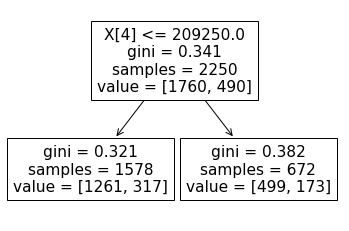

In [212]:
from sklearn import tree
tree.plot_tree(dtree)

# Softmax Regression

In [213]:
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [214]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, max_iter=1000)
softmax_reg.fit(X_train, y_train)


print('Train score: {:.4f}'.format(softmax_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(softmax_reg.score(X_test, y_test)))

Train score: 0.7850
Test score: 0.8067


In [215]:
y_pred=softmax_reg.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8066666666666666

In [217]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       600
           1       0.00      0.00      0.00         0

    accuracy                           0.81       600
   macro avg       0.50      0.40      0.45       600
weighted avg       1.00      0.81      0.89       600



In [218]:
#Confusion matrix
print(confusion_matrix(y_pred,y_test))

[[484 116]
 [  0   0]]


### We have KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. The cumulative results are given below


In [1]:
#Combined Results
df = pd.read_excel('Results.xlsx')
print (df)

NameError: name 'pd' is not defined

In [224]:
#From above we see that the best recall score is for SVC Poly with hyper parameter tuning
print(classification_report(y_pred_grid_poly,y_test))
print(confusion_matrix(y_pred_grid_poly,y_test))

              precision    recall  f1-score   support

           0       0.12      0.85      0.21        67
           1       0.91      0.20      0.33       533

    accuracy                           0.27       600
   macro avg       0.52      0.52      0.27       600
weighted avg       0.82      0.27      0.31       600

[[ 57  10]
 [427 106]]


# Project Report

# Project 1

### Dataset
For our Project we took two datasets and for Classification, we took the dataset of Credit Card Application from Kaggle.
There were two CSV files: Credit_card_application.csv and credit_record.csv which we combined to create one dataset.

These are the insights of the combined dataset before pre processing

- There were total 21 columns 
- There were 438558 instances (rows)
- There were 6 Categorical columns.
- There were 3 Oridanl Columns.
- 5%-10% of the dataset was missing.

The dataset was huge. We imputed the dataset with median and mean after checking the skewness of the dataset. We visualized
the dataset using bar charts, histogram and pie charts.

### Cleaning Process:

The dataset was huge therefore, it took a lot of preprocessing. The values were imputed on the basis of mean and median after visualizing and checking the skewness. We imputed categorical/ordinal values on the basis of count. In the end, we took a sample of 3000 rows out of 38558 dataset because it was huge.
 

### Classification models:

We ran different types of classification models such as:

#### Knn Classifier:

- We ran Knn Classifier on Grid Search and the best parameters that we received KNeighborsClassifier(metric='manhattan',       - n_neighbors=10)
- we received the train and test scores as follows:
- Train score: 0.7817
- Test score: 0.7933

#### Logistic Regressor:
- We ran Logistic Regressor on Grid Search and the best parameters that we received is - GridSearchCV(cv=5,estimator=LogisticRegression(max_iter=1000, random_state=0), param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

- we received scores as follows:
- accuracy_score:  0.815
- roc_auc_score:  0.46424031393356546

#### Linear SVC:
- We ran Linear SVC on Grid Search and the best parameters that we received is Best parameters: {'C': 0.001, 'gamma': 0.001}
- Best cross-validation score: 0.78.
- we received the train and test scores as follows:
- Train score: 0.7779
- Test score: 0.8150

#### SVC Kernel Poly:
- We ran GridSearchCV on SVC kernel Poly in order to find the best parameters. We received these as follows:
- Best parameters: {'C': 0.001, 'gamma': 0.001}
- Best cross-validation score: 0.78

#### SVC rbf:
- We ran GridSearchCV on SVC rbf in order to find the best parameters. We received these as follows:
- SVC(C=0.001, gamma=0.001, max_iter=450)
- best score: 0.7779166666666667

#### SVC Kernel -  linear:
We hyper tuned this model in order to find the best parameters
- best score: 0.7779166666666667
- Best parameters: {'C': 0.001, 'gamma': 0.001}

#### Decision Tree :
We ran Grid Search on Decision Tree in order to find the maximum depth and best parameters
- Best Parameters:  {'criterion': 'gini', 'max_depth': 3}
- Accuracy on training set: 0.776
- Accuracy on test set: 0.812

We have KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. The best accuracy score as per recall is for SVC POLY with hyperparamter tuning.\

Confusion Matrix
[[ 57  10]
 [427 106]]
 
106 good clients were predicted correctly


### We have avoided visualization for the models as it's breaking the code